In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import parse

plt.style.use(["science", "no-latex"])
LABELS = ["hr", "bs", "sr", "me"]
raw_dir = "/home/peterr/macocu/taskB/data/raw"
interim_dir = "/home/peterr/macocu/taskB/data/interim"
final_dir = "/home/peterr/macocu/taskB/data/final"


def load_SET_dataset():
    SETimes = list()
    splits = list()
    for split in ["train", "test", "dev"]:
        with open(os.path.join(final_dir, f"{split}.fasttxt"), "r") as f:
            lines = f.readlines()
            SETimes.extend(lines)
            splits.extend([split]*len(lines))
    p = parse.compile("__label__{lang} {text}")
    langs = list()
    texts = list()

    for line in SETimes:
        results = p.parse(line)
        if not results:
            logging.error(f"Error parsing line {line}")
            continue
        langs.append(results["lang"])
        texts.append(results["text"])
    eval_df = pd.DataFrame(data={"text": texts, "labels": langs, "split": splits })
    return eval_df

In [26]:
df = load_SET_dataset()

In [27]:
df.loc[df.labels=="hr", :]

,text,labels,split
2558,Kultura i sport: Makedonski pravoslavci prosla...,hr,train
2559,Arsim Bajrami je predsjedavajući Odbora skupšt...,hr,train
2560,U Srbiji se obavljaju samo presađivanje bubreg...,hr,train
2561,Useljenik nosi kašetu rajčica na glavnoj tržni...,hr,train
2562,Oko petina stanovništva BiH posjeduje neregist...,hr,train
...,...,...,...
8944,Ministar prosvjete Pero Stojanovski izjavio je...,hr,dev
8945,Obnovljena bolnica pruža pacijentima veću udob...,hr,dev
8946,Predsjednik Srbije Boris Tadić smije se uoči p...,hr,dev
8947,Predsjednik kompanije Zarubezhnefta Vladimir I...,hr,dev


In [28]:
df.labels.value_counts()

hr    3196
bs    3195
sr    2867
Name: labels, dtype: int64

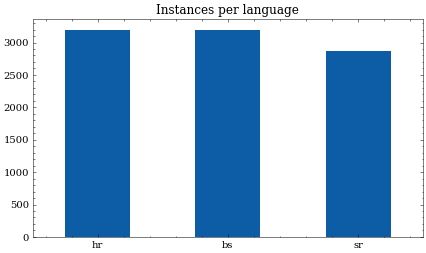

In [37]:
plt.figure(figsize=(7, 4))
df.labels.value_counts().plot(kind="bar")
plt.title("Instances per language")
plt.gca().tick_params(axis="x", rotation=0)

plt.savefig("/home/peterr/macocu/taskB/task4/setimes_dataset/images/instances_per_language.png")

In [63]:
df["length"] = df.text.apply(len)

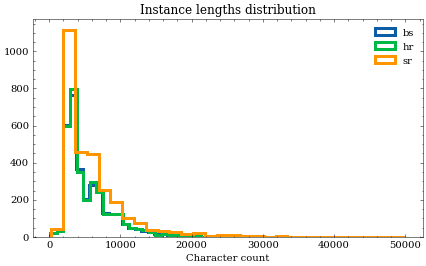

In [64]:
plt.figure(figsize=(7, 4))
for lang in df.labels.unique():
    plt.hist(df.loc[df.labels == lang, "length"].values, histtype="step", label=lang, lw=3, bins=30 )
plt.xlabel("Character count")
plt.legend()
plt.title("Instance lengths distribution")
plt.savefig("/home/peterr/macocu/taskB/task4/setimes_dataset/images/distributions.png")

In [50]:
df.shape

(9258, 4)

In [62]:

df.drop(columns="length"
    ).rename(columns={"labels":"language"}
    ).to_json("/home/peterr/macocu/taskB/task4/setimes_dataset/SETimes.json",
orient="index", indent=4,

)